In [1]:
# Importing the dataset
dataset = read.csv(file.choose())

In [2]:
# Feature Selection
fs = dataset[4:5] # select the 4st, 5st column

In [3]:
# Pre-processing
na = sum(is.na(fs))

In [ ]:
# packages installation
install.packages('caTools')
install.packages("cluster")
library(cluster)
library(caTools)

In [12]:
# Data Partition
set.seed(123)
partition = sample.split(fs,SplitRatio = 0.7)

In [11]:
training_data = fs[partition == TRUE,]
head(training_data)
test_data = fs[partition == FALSE,]
head(test_data)

,AnnualIncome,Spending.Score..1.100.
,<int>,<int>
1,15,39
3,16,6
5,17,40
7,18,6
9,19,3
11,19,14


,AnnualIncome,Spending.Score..1.100.
,<int>,<int>
2,15,81
4,16,77
6,17,76
8,18,94
10,19,72
12,19,99


In [7]:
# Using the elbow method to find the optimal number of clusters
wcss = vector()
for (i in 1:10) {
        wcss[i] = sum(kmeans(fs, i)$withinss)
}

wcss_tot = vector()
for (i in 1:10) {
        wcss_tot[i] = kmeans(fs, i)$tot.withinss
}

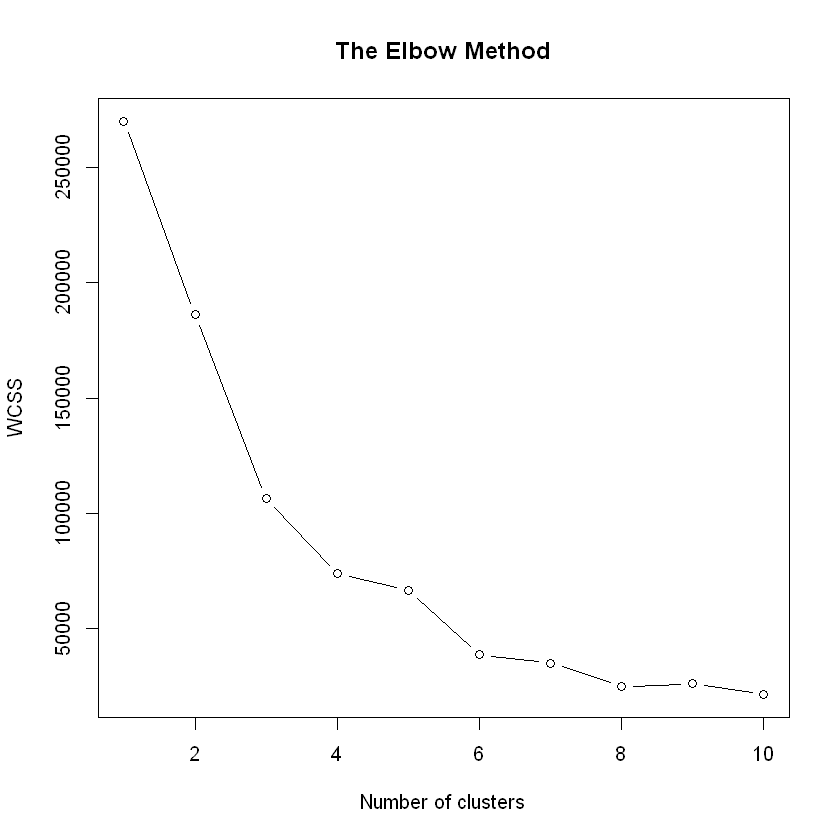

In [8]:
# plot(x axis value=no of cluster,y axis value=wcss,type of the graph,title of the graph,x axis label,y axis label)
plot(1:10,
     wcss,
     type = 'b',
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters',
     ylab = 'WCSS'
)

In [9]:
# Fitting K-Means to the dataset
set.seed(29)
kmeans = kmeans(x = fs, centers = 5)
y_kmeans = kmeans$cluster

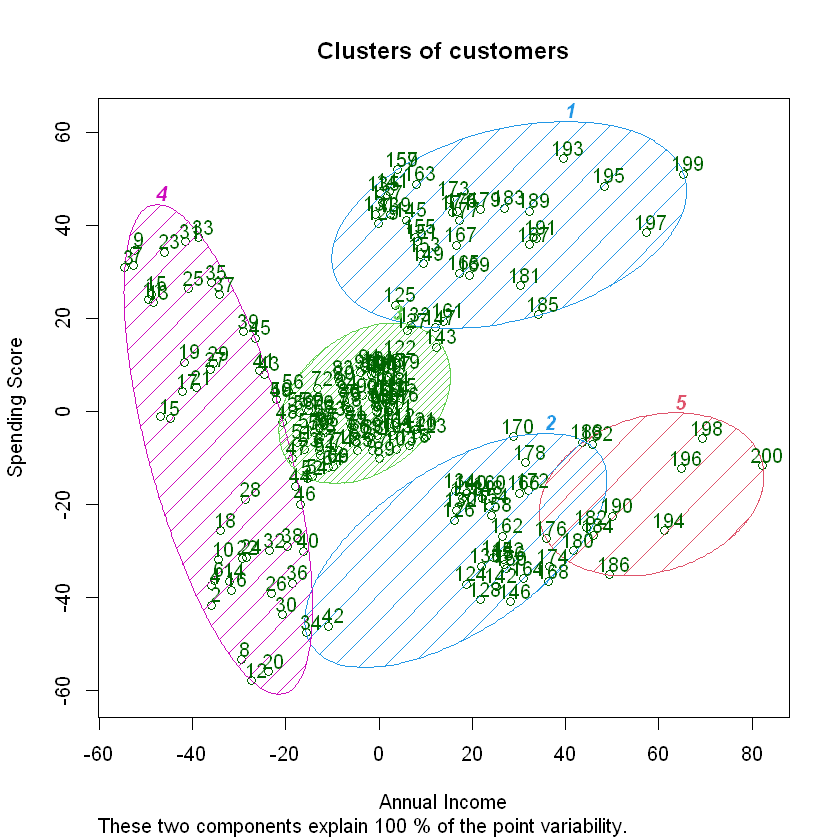

In [10]:
# Visualising the clusters
clusplot(fs,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Clusters of customers'),
         xlab = 'Annual Income',
         ylab = 'Spending Score'
)